# What's the data like?

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import seaborn as sns
import os, dotenv
project_path = os.path.dirname(dotenv.find_dotenv())

In [3]:
"""
load data
"""

df = pd.read_csv(project_path + '/data/raw/data.csv', index_col=0)
df.head()

,index,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0,98.82,98.82,98.82,98.82,1364684400,0.00,0.00,2013-03-31 00:00:00
1,1,100.73,100.73,98.82,98.82,1364688000,2.00,201.47,2013-03-31 01:00:00
2,2,100.73,100.73,100.73,100.73,1364691600,0.00,0.00,2013-03-31 03:00:00
3,3,92.92,105.83,92.92,105.83,1364695200,5.38,500.00,2013-03-31 04:00:00
4,4,92.92,92.92,92.92,92.92,1364698800,0.00,0.00,2013-03-31 05:00:00


In [4]:
"""
descriptive stats
"""
df.describe()

,index,close,high,low,open,time,volumefrom,volumeto
count,46001.000000,46001.000000,46001.000000,46001.000000,46001.000000,4.600100e+04,4.600100e+04,4.600100e+04
mean,1000.478250,1908.164433,1926.324707,1890.067534,1908.095344,1.447484e+09,3.238061e+03,8.729540e+06
std,577.369042,3280.744607,3306.772240,3251.999708,3280.614909,4.780616e+07,5.962742e+04,2.894615e+07
min,0.000000,53.830000,53.830000,5.760000,53.830000,1.364684e+09,0.000000e+00,0.000000e+00
25%,500.000000,278.580000,280.530000,276.980000,278.500000,1.406084e+09,1.903300e+02,9.972974e+04
50%,1000.000000,554.230000,561.300000,545.750000,554.400000,1.447484e+09,1.419850e+03,6.033249e+05
75%,1500.000000,1125.160000,1171.080000,1092.800000,1124.040000,1.488884e+09,3.042020e+03,3.474253e+06
max,2000.000000,19784.930000,19870.620000,19691.740000,19784.930000,1.530284e+09,8.410600e+06,2.305670e+09


In [5]:
"""
Check shape and confirm that no NA values are present
"""
df.dropna().shape == df.shape, df.shape

(True, (46001, 9))

In [6]:
"""
Number of unique timepoints
"""
df.time.unique().shape

(46001,)

In [7]:
"""
Take a small sample for plotting
"""
sample = df.sample(n=1000, replace=False)

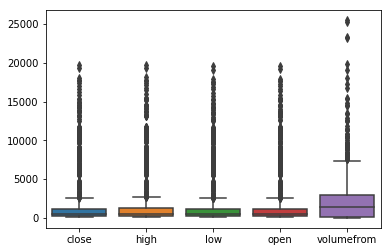

In [12]:
"""
Check relative distribution of data features
"""
sns.boxplot(data=sample[['close', 'high', 'low', 'open', 'volumefrom']])

"\nNote: Something wrong with display of X-axis dates here ... I've confirmed dates are correct in dataframe. strange.\nAlso current/past price makes sense on this chart.\n"

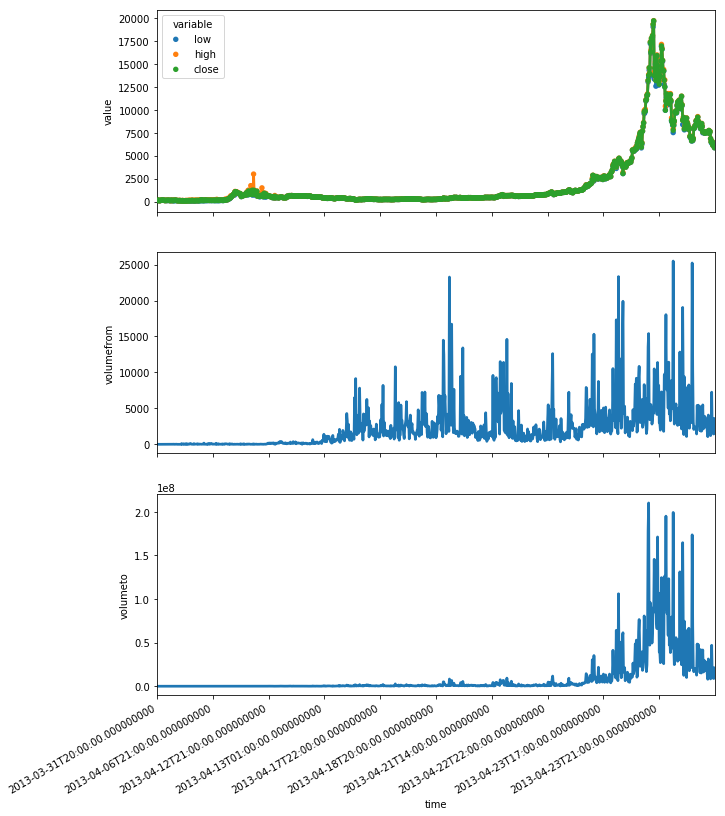

In [9]:
"""
Plot data features against time. Making sure that the data set was created correctly / sanity check.
"""

pltdata = sample.copy()
pltdata.time = pd.to_datetime(pltdata.time, unit='s')


fig, ax = plt.subplots(3, sharex=True)
fig.set_size_inches((10,14))
for a in ax:
    a.xaxis_date()

pricedata = pd.melt(sample, id_vars='time', value_vars=['low', 'high', 'close'])
sns.pointplot(ax=ax[0], data=pricedata, x='time', y='value', hue='variable', linestyles='-', markers='.')
sns.pointplot(ax=ax[1], data=pltdata, x='time', y='volumefrom', linestyles='-', markers='')
sns.pointplot(ax=ax[2], data=pltdata, x='time', y='volumeto', linestyles='-', markers='')
locs, labels = plt.xticks()
plt.xticks([locs[x*100] for x in range(int(len(locs) / 100))])
fig.autofmt_xdate()

"""
Note: Something wrong with display of X-axis dates here ... I've confirmed dates are correct in dataframe. strange.
Also current/past price makes sense on this chart.
""" 

In [9]:
"""
Dates go until 2018 and are mostly unique.
"""
pd.to_datetime(df.time.unique(), unit='s')

DatetimeIndex(['2018-04-03 06:00:00', '2018-04-03 07:00:00',
               '2018-04-03 08:00:00', '2018-04-03 09:00:00',
               '2018-04-03 10:00:00', '2018-04-03 11:00:00',
               '2018-04-03 12:00:00', '2018-04-03 13:00:00',
               '2018-04-03 14:00:00', '2018-04-03 15:00:00',
               ...
               '2013-06-17 20:00:00', '2013-06-17 21:00:00',
               '2013-06-17 22:00:00', '2013-06-17 23:00:00',
               '2013-06-18 00:00:00', '2013-06-18 01:00:00',
               '2013-06-18 02:00:00', '2013-06-18 03:00:00',
               '2013-06-18 04:00:00', '2013-06-18 05:00:00'],
              dtype='datetime64[ns]', length=46001, freq=None)